In [1]:
from google.colab import drive


In [2]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:


import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib
import cv2
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.models import Sequential, Model,load_model
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from keras.preprocessing import image
from keras.initializers import glorot_uniform
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D,Dropout
import tensorflow as tf
import splitfolders 
import pandas as pd
import glob
from sklearn.metrics import confusion_matrix
import plotly.graph_objects as go
import itertools
import plotly.express as px
#Suppressing Warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 



In [4]:
ROOT = "/content/drive"     # default location for the drive
print(ROOT)

/content/drive


In [5]:
drive.mount(ROOT) 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
data_dir = "/content/drive/My Drive/python/Jeudedonnees/Nos_images"
data_dir = pathlib.Path(data_dir)

**Importing Image**

In [7]:
Total_Images = glob.glob("/content/drive/My Drive/python/Dataset1/*/*/*")
print("Nombres total des images", len(Total_Images))
Total_Images = pd.Series(Total_Images)

Nombres total des images 19245


In [8]:
Total_Df = pd.DataFrame()

Total_Df['FileName'] = Total_Images.map(lambda ImageName :ImageName.split("H")[-1])

Total_Df['ClassId'] = Total_Images.map(lambda ImageName :ImageName.split("/")[-2])

Total_Df.head()

,FileName,ClassId
0,.jpeg,chien
1,aEK.jpeg,chien
2,aJ3.jpeg,chien
3,aE7.jpeg,chien
4,aE8.jpeg,chien


In [9]:
Class_Id_Dist_Total = Total_Df['ClassId'].value_counts()
Class_Id_Dist_Total.head(10)

chien       4862
vollaile    3098
cheval      2623
vache       1866
ecureuil    1862
mouton      1820
chat        1668
elephant    1446
Name: ClassId, dtype: int64

**Distribution des donnees**

In [10]:
fig = go.Figure(go.Bar(
            x= Class_Id_Dist_Total.values,
            y=Class_Id_Dist_Total.index,
            orientation='h'))

fig.update_layout(title='Data Distribution in Bars',font_size=15,title_x=0.45)


fig.show()


In [11]:
fig=px.pie(Class_Id_Dist_Total.head(10),values= 'ClassId', names=Total_Df['ClassId'].unique(),hole=0.425)
fig.update_layout(title='Data Distribution of Data',font_size=15,title_x=0.45,annotations=[dict(text='Animas-8',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

In [37]:
train_path = "/content/drive/My Drive/python/Dataset1/train"
test_path = "/content/drive/My Drive/python/Dataset1/val"
class_names=os.listdir(train_path)
class_names

['chien',
 'cheval',
 'elephant',
 'vollaile',
 'chat',
 'vache',
 'mouton',
 'ecureuil']

In [13]:
train_image1 = glob.glob("/content/drive/My Drive/python/Dataset1/train/*/*")

Total_TrainImages = train_image1 
print("Nombres total d'mage d'entrainement: ", len(Total_TrainImages))


test_image1 = glob.glob("/content/drive/My Drive/python/Dataset1/val/*/*")

Total_TestImages = test_image1
print("Total number of test images: ", len(Total_TestImages))



#Val_image1 = glob.glob('./output/val/*/*.jpeg')

#Total_ValImages = Val_image1 
#print("Total number of val images: ", len(Total_ValImages))

Nombres total d'mage d'entrainement:  15392
Total number of test images:  3853


In [14]:
random_x = [len(Total_TrainImages), len(Total_TestImages)]
names = ['Train_Data', 'Test_Data']
fig = px.pie(values=random_x, names=names)
fig.update_layout(title='Data Distribution',font_size=15,title_x=0.45,annotations=[dict(text='Animas-10',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

In [15]:
train_image_names = pd.Series(Total_TrainImages)
train_df = pd.DataFrame()

# generate Filename field
train_df['Filename'] = train_image_names.map( lambda img_name: img_name.split("/")[-1])


# generate ClassId field
train_df['ClassId'] = train_image_names.map(lambda img_name: img_name.split("/")[-2])

train_df.head()

,Filename,ClassId
0,OIP-Sc7L6azQpFn8J7ocwc2cAwHaLH.jpeg,chien
1,OIP-Uy6lrCajhfsJTXWuaaXIxAHaEK.jpeg,chien
2,OIP-T-cGUXyd1P3ZH90M3RGehgHaJ3.jpeg,chien
3,OIP-_ARj2MBgX4SCNmtoxg4J4wHaE7.jpeg,chien
4,OIP-U79zp8uUyU9JHemjc34lzgHaE8.jpeg,chien


In [16]:
class_id_distribution_Train = train_df['ClassId'].value_counts()
class_id_distribution_Train.head(10)

chien       3889
vollaile    2478
cheval      2098
vache       1492
ecureuil    1489
mouton      1456
chat        1334
elephant    1156
Name: ClassId, dtype: int64

In [17]:
fig = go.Figure(go.Bar(
            x=class_id_distribution_Train.values,
            y=class_id_distribution_Train.index,
            orientation='h'))

fig.update_layout(title='Data Distribution Of Train Data in Bars',font_size=15,title_x=0.45)

fig.show()

In [18]:
fig=px.pie(class_id_distribution_Train.head(10),values= 'ClassId', names=train_df['ClassId'].unique(),hole=0.425)
fig.update_layout(title='Data Distribution of Train Data in Pie Chart',font_size=15,title_x=0.45,annotations=[dict(text='Animas-10',font_size=18, showarrow=False,height=800,width=700)])
fig.update_traces(textfont_size=15,textinfo='percent')
fig.show()

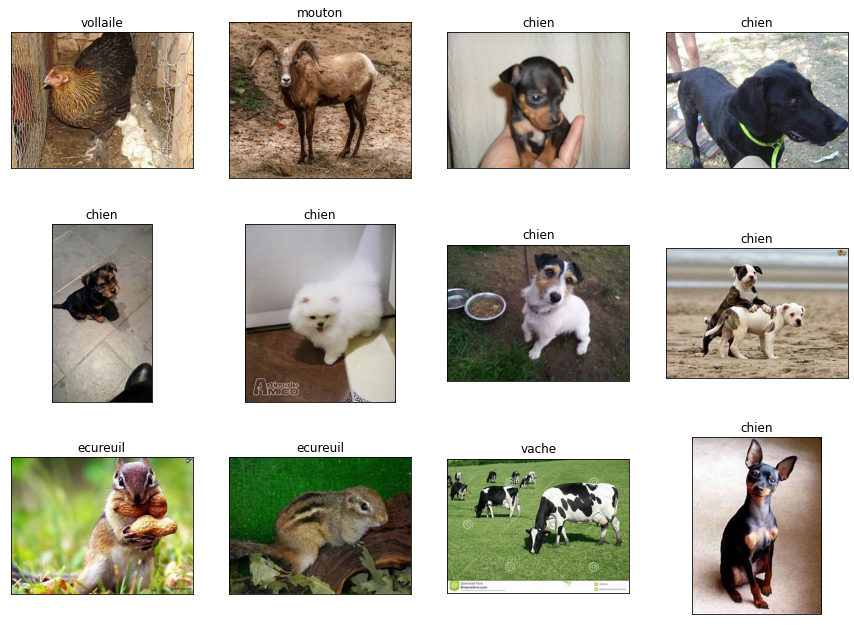

In [19]:


plot_df = train_df.sample(12).reset_index()
plt.figure(figsize=(15, 15))

for i in range(12):
    img_name = plot_df.loc[i, 'Filename']
    label_str = (plot_df.loc[i, 'ClassId'])
    plt.subplot(4,4,i+1)
    plt.imshow(plt.imread(os.path.join(train_path,label_str, img_name)))
    plt.title(label_str)
    plt.xticks([])
    plt.yticks([])
    plt.yticks([])



Generate image

In [45]:


from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
val_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_directory(train_path,target_size=(224, 224),batch_size=32,shuffle=True)
test_generator = test_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size=32,shuffle=False)



Found 15392 images belonging to 8 classes.
Found 3853 images belonging to 8 classes.


In [46]:
def identity_block(X, f, filters, stage, block):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X
   
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X

In [47]:
def convolutional_block(X, f, filters, stage, block, s=2):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [48]:
def ResNet50(input_shape=(224, 224, 3)):

    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)
    
    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model


In [49]:
base_model = ResNet50(input_shape=(224, 224, 3))

In [50]:
headModel = base_model.output
headModel = Flatten()(headModel)
headModel=Dense(256, activation='relu', name='fc1',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel=Dense(128, activation='relu', name='fc2',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel = Dense( 10,activation='softmax', name='fc3',kernel_initializer=glorot_uniform(seed=0))(headModel)

Transfert learning on importe un modele entrainer quon va entrainer a notre **tour**

In [51]:
model = Model(inputs=base_model.input, outputs=headModel)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_1 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_3[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1 (Conv2D)                 (None, 112, 112, 64  9472        ['zero_padding2d_1[0][0]']       
                                )                                                           

In [52]:
from tensorflow.keras.applications import ResNet50

modelT = ResNet50(
      input_shape = (224,224,3),
      include_top = False,
      weights = 'imagenet'
    )

In [53]:
for layers in modelT.layers:
    layers.trainable = False

In [58]:
from keras.layers import  Dropout
y = Flatten()(modelT.output)
y = Dropout(0.5)(y)
y = Dense(8, activation = "softmax")(y)

modelT = keras.Model(modelT.input, y)
modelT.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = "accuracy")
modelT.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [55]:
es=EarlyStopping( mode='max', verbose=1, patience=20)


In [56]:
mc = ModelCheckpoint('./kaggle/working/model.h5', mode='max' )


In [ ]:
History = modelT.fit_generator(train_generator,epochs=10,verbose=1, callbacks=[mc,es])

<ipython-input-59-c41cd7de1dec>:1: UserWarning:

`Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.



Epoch 1/10
164/481 [=========>....................] - ETA: 43:38 - loss: 2.0745 - accuracy: 0.2315

Prediction

In [ ]:
test_loss, test_acc = modelT.evaluate(test_generator, steps=len(test_generator), verbose=1)
 print('Loss: %.3f' % (test_loss * 100.0))
 print('Accuracy: %.3f' % (test_acc * 100.0)) 

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_val = test_generator.classes
y_pred = modelT.predict(test_generator)
y_pred = np.argmax(y_pred,axis=1)

In [ ]:


print(classification_report(y_val,y_pred))



In [ ]:
class_indices = test_generator.class_indices
indices = {v:k for k,v in class_indices.items()}


In [ ]:


filenames = test_generator.filenames



In [ ]:
val_df = pd.DataFrame()
val_df['filename'] = filenames
val_df['actual'] = y_val
val_df['predicted'] = y_pred
val_df['actual'] = val_df['actual'].apply(lambda x: indices[x])
val_df['predicted'] = val_df['predicted'].apply(lambda x: indices[x])
val_df.loc[val_df['actual']==val_df['predicted'],'Same'] = True
val_df.loc[val_df['actual']!=val_df['predicted'],'Same'] = False
val_df.head(10)

In [ ]:
val_df = val_df.sample(frac=1).reset_index(drop=True)

Comparaison des predictions

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
img_size = 224
def readImage(path):
    img = load_img(path,color_mode='rgb',target_size=(img_size,img_size))
    img = img_to_array(img)
    img = img/255.
    
    return img

def display_images(temp_df):
    temp_df = temp_df.reset_index(drop=True)
    plt.figure(figsize = (20 , 20))
    n = 0
    for i in range(15):
        n+=1
        plt.subplot(5 , 5, n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
        image = readImage(f"../input/animals10/raw-img/{temp_df.filename[i]}")
        plt.imshow(image)
        plt.title(f'A: {temp_df.actual[i]} P: {temp_df.predicted[i]}')

**Bien classes**

In [ ]:


display_images(val_df[val_df['Same']==True])



**Mal classe**

In [ ]:
display_images(val_df[val_df['Same']!=True])

**Confusion matrix**

In [ ]:


cm = confusion_matrix(y_true=y_val, y_pred=y_pred)



In [ ]:
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

In [ ]:


cm_plot_labels = ['chien', 'chat', 'cheval', 'mouton', 'vache', 'elephant', 'ecurueil', 'vollaile']

plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')



In [ ]:
modelT.save("/content/drive/My Drive/python/animaux.h5")

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("/content/drive/My Drive/python/animaux.h5")